# Jigsaw Multilingual Toxic Comment Classification

## Data analysis

In [1]:
import warnings
from typing import List

import re
import numpy as np
import pandas as pd
from collections import Counter

import seaborn as sns
from matplotlib import pyplot as plt

from string import punctuation
from nltk.tokenize import RegexpTokenizer

from IPython.display import display

warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', 1000)

%matplotlib inline
sns.set_style('darkgrid')

punctuation += '«»—…“”*№–'

In [2]:
train = pd.read_csv('jigsaw-toxic-comment-train.csv')
val = pd.read_csv('validation.csv')

In [3]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
223544,fff8f64043129fa2,":Jerome, I see you never got around to this…! I’m not surprised: I looked for an example of the ‘’in nomine’’ plainsong notaion and couldn’t find one online - to my astonishment too. \n :But maybe you could clear up a question for me: is the cantus firmus of the English ‘’in nomines’’ the plainchant (in the alto part), or one of Taverner’s other three parts? This is not clear to me in the article. If the ‘’in nomines’’ are based on the plainchant, then where does Taverner come into it? Your expertise would be most appreciated, and maybe the article requires some explanation to this effect.",0,0,0,0,0,0
223545,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundation.org/wiki/Press_releases/English_Wikipedia_Announces_Thousandth_Featured_Article \n\n Heh you are famous now. I kida envy that. Congrats.,0,0,0,0,0,0
223546,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak about gays and not about romanians...,0,0,0,0,0,0
223547,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MOVIES. HE HAS SO MUCH BUTTSEX THAT HIS ASSHOLE IS NOW BIG ENOUGH TO BE CONSIDERED A COUNTRY.,1,0,1,0,1,0


In [4]:
val

,id,comment_text,lang,toxic
0,0,"Este usuario ni siquiera llega al rango de hereje . Por lo tanto debería ser quemado en la barbacoa para purificar su alma y nuestro aparato digestivo mediante su ingestión. Skipe linkin 22px Honor, valor, leltad. 17:48 13 mar 2008 (UTC)",es,0
1,1,"Il testo di questa voce pare esser scopiazzato direttamente da qui. Immagino possano esserci problemi di copyright, nel fare cio .",it,0
2,2,"Vale. Sólo expongo mi pasado. Todo tiempo pasado fue mejor, ni mucho menos, yo no quisiera retroceder 31 años a nivel particular. Las volveria a pasar putas.Fernando",es,1
3,3,"Bu maddenin alt başlığı olarak uluslararası ilişkiler ile konuyu sürdürmek ile ilgili tereddütlerim var.Önerim siyaset bilimi ana başlığından sonra siyasal yaşam ve toplum, siyasal güç, siyasal çatışma, siyasal gruplar, çağdaş ideolojiler, din, siyasal değişme, kamuoyu, propaganda ve siyasal katılma temelinde çoğulcu siyasal sistemler.Bu alt başlıkların daha anlamlı olacağı kanaatindeyim.",tr,0
4,4,"Belçika nın şehirlerinin yanında ilçe ve beldelerini yaparken sanırım Portekizi örnek alacaksın. Ben de uzak gelecekte(2-3 yıl) bu tip şeyler düşünüyorum. Tabii futbol maddelerinin hakkından geldikten sonra.. daha önce mesajlarınızı görmüştüm, hatta anon bölümünü bizzat kullanıyordum sözünü anlamadım?? tanışmak bugüneymiş gibi bir şey eklemeyi düşündüm ama vazgeçtim. orayı da silmeyi unuttum. boşverin Kıdemli +",tr,0
...,...,...,...,...
7995,7995,Il fatto è che la pagina dei personaggi minori la intendiamo come temporanea fino a che i personaggi non abbiano una quantità di informazioni consistenti. Inoltre molti redirect puntano ai singoli personaggi Indy nel museo di,it,0
7996,7996,El imbesil ete dela luna no se entera ni ostias so ijo puta!! esto es un nicho ecológico i no un puto forum dela luna Coño ya!!! agregame: metemelamasadentro_ahsi@hotmail.com acias.,es,1
7997,7997,olum sız manyakmısınz siz adam sıze sanal yıldız vermıs bilmem nerenız kalkmıs bedava kole dıye calıstırıyorlar sızı siz hala uyuyuyn olmayan bi odul aldım dıye o odul birgun gercek olursa uzerine oturursun saygılarla,tr,1
7998,7998,El mapa del reinado de Alhaken esta ligeramente exagerado en la zona del pirineo aragonés.Jaca por ejemplo fue tomada en el 780 (¡200 años antes de este reinado!)Tal vez vendría bien cambiar la imagen... 21:30 22 nov 2007 (CET),es,0


### Validation data languages

In [5]:
val[['lang', 'toxic']].groupby('lang').count()

,toxic
lang,
es,2500
it,2500
tr,3000


In [6]:
val[['lang', 'toxic']].groupby('lang').sum() / val[['lang', 'toxic']].groupby('lang').count()

,toxic
lang,
es,0.168800
it,0.195200
tr,0.106667


The percentages of toxic comments vary slightly across the three languages.

### Character lengths

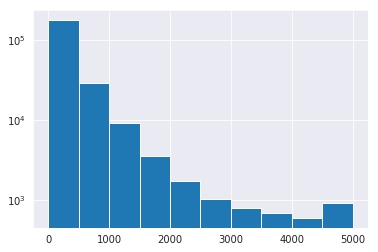

In [7]:
train_lens = train.comment_text.apply(len)
plt.hist(train_lens, log=True);

In [8]:
train_lens.describe()

count    223549.000000
mean        391.012709
std         592.862955
min           1.000000
25%          93.000000
50%         203.000000
75%         431.000000
max        5000.000000
Name: comment_text, dtype: float64

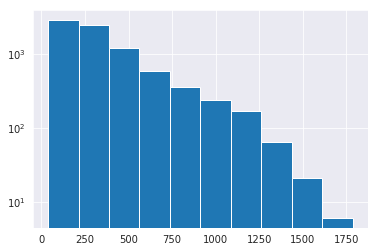

In [9]:
val_lens = val.comment_text.apply(len)
plt.hist(val_lens, log=True);

In [10]:
val_lens.describe()

count    8000.000000
mean      368.988000
std       271.620356
min        39.000000
25%       175.000000
50%       278.000000
75%       469.000000
max      1785.000000
Name: comment_text, dtype: float64

The comments in the train set are much more varied in length, but the means are similar.

### Token lengths

Before we get down to computing token lengths, let's develop a normalization algorithm for the extremely dirty data we are dealing with.

In [11]:
punctuation = punctuation.replace('[', '\[').replace(']', '\]')

In [12]:
token_pattern = re.compile(r"n't|'m|'re|'s|'d|can|\w+(?=n't)|\w+|\d+|[" + punctuation + r']|' + '[^\w\s]', re.IGNORECASE)
tokenize = token_pattern.findall

In [13]:
for i in range(5):
    print('\n'.join(tokenize(train.comment_text[i])))
    print()

Explanation
Why
the
edits
made
under
my
username
Hardcore
Metallica
Fan
were
reverted
?
They
were
n't
vandalisms
,
just
closure
on
some
GAs
after
I
voted
at
New
York
Dolls
FAC
.
And
please
do
n't
remove
the
template
from
the
talk
page
since
I
'm
retired
now
.
89
.
205
.
38
.
27

D
'
aww
!
He
matches
this
background
colour
I
'm
seemingly
stuck
with
.
Thanks
.
(
talk
)
21
:
51
,
January
11
,
2016
(
UTC
)

Hey
man
,
I
'm
really
not
trying
to
edit
war
.
It
's
just
that
this
guy
is
constantly
removing
relevant
information
and
talking
to
me
through
edits
instead
of
my
talk
page
.
He
seems
to
care
more
about
the
formatting
than
the
actual
info
.

"
More
I
can
'
t
make
any
real
suggestions
on
improvement
-
I
wondered
if
the
section
statistics
should
be
later
on
,
or
a
subsection
of
"
"
types
of
accidents
"
"
-
I
think
the
references
may
need
tidying
so
that
they
are
all
in
the
exact
same
format
ie
date
format
etc
.
I
can
do
that
later
on
,
if
no
-
one
else
does
first
-
if
you
have
any
preferen

In [14]:
punct = set(punctuation)

def transform(x: str) -> str:
    if x.isdigit():
        return '<DIGIT>'
    
    if x in punct:
        return '<PUNCT>'
    
    return x

def normalize(text: str) -> List[str]:
    return list(map(transform, tokenize(text.lower())))

In [15]:
train['tokens'] = train.comment_text.apply(normalize)
val['tokens'] = val.comment_text.apply(normalize)

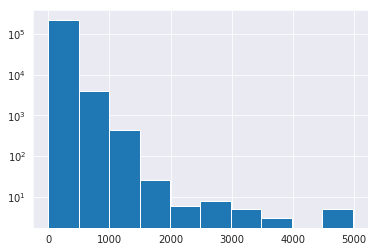

In [16]:
train['token_lens'] = train.tokens.apply(len)
plt.hist(train.token_lens, log=True);

In [17]:
train.token_lens.describe()

count    223549.000000
mean         84.280780
std         129.888159
min           1.000000
25%          22.000000
50%          45.000000
75%          93.000000
max        4976.000000
Name: token_lens, dtype: float64

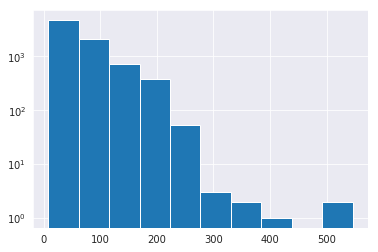

In [18]:
val['token_lens'] = val.tokens.apply(len)
plt.hist(val.token_lens, log=True);

In [19]:
val.token_lens.describe()

count    8000.000000
mean       68.025625
std        47.982275
min         8.000000
25%        34.000000
50%        52.000000
75%        86.000000
max       546.000000
Name: token_lens, dtype: float64

Now we can see that validation texts are usually shorter (although it should be noted that the token pattern was not fine-tuned for the multilingual validation set, so maybe that's the reason). Texts from the training set are still much more varied in their lengths.

### Length vs. toxicity type

In [20]:
for column in ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'):
    display(train[[column, 'token_lens']].groupby(column).describe())

token_lens                                                      
           count       mean         std  min   25%   50%   75%     max
toxic                                                                 
0       202165.0  86.437949  126.484282  1.0  23.0  47.0  96.0  4976.0
1        21384.0  63.886831  157.042343  1.0  13.0  27.0  57.0  4950.0

token_lens                                                      
                  count       mean         std  min   25%   50%   75%     max
severe_toxic                                                                 
0              221587.0   83.97679  127.169235  1.0  22.0  45.0  93.0  4976.0
1                1962.0  118.61315  307.677077  2.0  12.0  24.0  57.0  4850.0

token_lens                                                      
             count       mean         std  min   25%   50%   75%     max
obscene                                                                 
0         211409.0  85.443647  127.649576  1.0  22.0  46.0  95.0  4976.0
1          12140.0  64.030313  162.723979  1.0  12.0  25.0  53.0  4950.0

token_lens                                                      
            count       mean         std  min   25%   50%   75%     max
threat                                                                 
0        222860.0  84.281989  129.222038  1.0  22.0  45.0  93.0  4976.0
1           689.0  83.889695  269.822227  2.0  15.0  27.0  54.0  4618.0

token_lens                                                     
            count      mean         std  min   25%   50%   75%     max
insult                                                                
0        212245.0  85.46084  128.232047  1.0  22.0  46.0  95.0  4976.0
1         11304.0  62.12385  156.148356  1.0  12.0  25.0  53.0  4850.0

token_lens                                                      
                   count       mean         std  min   25%   50%   75%     max
identity_hate                                                                 
0               221432.0  84.434260  129.437375  1.0  22.0  45.0  93.0  4976.0
1                 2117.0  68.227208  169.857921  2.0  12.0  25.0  55.0  3848.0

All of the toxicity types are quite rare, especially identity hate, severe toxic comments, and threats. Most toxic comments are usually shorter than normal comments, with the exception of severe toxic comments that are considerably longer and threats that are about the same length.

### Toxicity examples

In [21]:
for column in ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'):
    display(train[['comment_text', column]][train[column] == 1][:10])

,comment_text,toxic
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
12,"Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...",1
16,"Bye! \n\nDon't look, come or think of comming back! Tosser.",1
42,"You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!\n\nBeware of the Dark Side!",1
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1
44,"I'm Sorry \n\nI'm sorry I screwed around with someones talk page. It was very bad to do. I know how having the templates on their talk page helps you assert your dominance over them. I know I should bow down to the almighty administrators. But then again, I'm going to go play outside....with your mom. 76.122.79.82",1
51,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK THAT YOU CANT PUT DOWN???/ GET FUCK UP GET FUCKED UP. I'M FUCKED UP RIGHT NOW!,1
55,Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!,1
56,=Tony Sidaway is obviously a fistfuckee. He loves an arm up his ass.,1
58,"My Band Page's deletion. You thought I was gone. \n\nDeleting the comment I posted on your 'talk page' does not delete my feelings for your hasty decision to delete my page. You, sir, are still a cock-sucking douche fuck. Sit back for a second and think about what your life has become. ............ Done? That didn't take long did it? Nope. Because, as I am most certainly aware, your life is a shitstorm of sitting in front of the computer masturbating to fictional creatures. Your attempts to get rid of me are mediocre at best. You are constantly sucking the dick of failure. You don't want a personal attack, huh? Well, too bad, Fuckcock McDickerson. You've got one. From me. You can go ahead and delete my profile from wikipedia. I'll just make another one and come right back to 'Syrthiss's talk page and insult the dick off of you. How could you shatter the dreams of an innocent eighteen year old college freshman trying to make a name for his band. Does that make you happy? Fucking wit...",1


,comment_text,severe_toxic
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
55,Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!,1
181,you are a stupid fuck \n\nand your mother's cunt stinks,1
442,Hi \n\nIm a fucking bitch.\n\n50.180.208.181,1
579,What a motherfucking piece of crap those fuckheads for blocking us!,1
746,"""You know, I was thinking...\n\nNobody really attacked me before I revealed my age here. After I announced that I was 14, I was subject to a constant storm of harassment and abuse.\n\nThe same thing goes for when I was on The Sandbox when I was 11. Before people knew my age, they didn't care. After I told them my age, they hated me.\n\nIt's just so amusing how the idiot Soapboxers think of teenagers as being responsible for the """"decline"""" of The Soapbox (like it was ever any good to begin with). This is funny, because the adults are the dumbest people here. Mauricio, Chuppah, Redneckgirl, Pinky, Scooby, GG, ForeverLostTinkerbell, greenrabbit, StarRocketsInFlight, Bree-Robinson, enigma-72, CocaineNightmares, TokyoDome, Chad_Ocho-Cinco, Steve Lake...\n\n...all adults.\n\nThe teenage posters here are typically the smartest ones. Let's see... G-Dawg, Head_Banging_Brunette, ClassicAge, Metropolis (even though he's a bipolar weirdo), ChrisScript, just to name a few.\n\nAll I ever ...",1
756,"Here's an idea \n\nGo fuck yourself, cumshitter.",1
761,""" WILL MY MOTHERFUCKING SAFETY BE GUARANTEED???? I FUCKING HOPE SO!!! I'M BRINGING MY OWN FUCKIN' WEAPONS!! PAY ME WHEN I GET BACK MOTHERFUCKERS!!! OH YEAH I'VE GOT A JOKE...A FAMILY (HUSBAND, WIFE, SON, DAUGHTER, DOG) WALKS INTO AN AGENT'S OFFICE AND TELLS HIM THAT THEY'VE GOT A GREAT VAUDEVILLE ROUTINE...HE SAYS """"WE DON'T HIRE KIDDY ACTS"""" AND THEY SAY """"BUT WE'RE REALLY GOOD!"""" AND SO THE AGENT SAYS """"FINE, LET ME SEE WHAT YOU'VE GOT, BUT IF YOU SUCK I'M THROWING YOU OUT""""...SO THE FAMILY GETS READY...THE DAUGHTER HITS THE CD PLAYER AND CIRCUS MUSIC BEGINS PLAYING, THE FATHER JUMP KICKS THE SON IN THE HEAD AND STOMS HIS FACE IN THE GROUND UNTIL IT'S A BLOODY PULP, THEN PROCEEDS TO JERK OFF AND CUM ALL OVER HIS SHATTERED SKULL. MEANWHILE THE MOTHER BEGINS VIOLENTLY FINGER FUCKING THE DAUGHTER AS THE DOG FUCKS THE MOTHER IN THE ASS HOLE. THIS IS THE POINT WHEN THE FATHER TAKES THE LEFTOVER BRAIN MATTER FROM THE SON'S HEAD AND SHOVES IT INTO THE MOTHER'S PUSSY, THEN BEGINS FUC...",1
887,"you gay motherfucker i know where you live,i am going to sand your face off,then i am to going to beat you to a pulp,you chicken shagger.",1
1017,"WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'LL FIND OUT WHERE YOU LIVE, SODOMIZE YOUR WIFE AND THEN BURN YOUR HOUSE DOWN. FUCK YOU YOU FUCKING QUEER.",1


,comment_text,obscene
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
42,"You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!\n\nBeware of the Dark Side!",1
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1
51,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK THAT YOU CANT PUT DOWN???/ GET FUCK UP GET FUCKED UP. I'M FUCKED UP RIGHT NOW!,1
55,Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!,1
56,=Tony Sidaway is obviously a fistfuckee. He loves an arm up his ass.,1
58,"My Band Page's deletion. You thought I was gone. \n\nDeleting the comment I posted on your 'talk page' does not delete my feelings for your hasty decision to delete my page. You, sir, are still a cock-sucking douche fuck. Sit back for a second and think about what your life has become. ............ Done? That didn't take long did it? Nope. Because, as I am most certainly aware, your life is a shitstorm of sitting in front of the computer masturbating to fictional creatures. Your attempts to get rid of me are mediocre at best. You are constantly sucking the dick of failure. You don't want a personal attack, huh? Well, too bad, Fuckcock McDickerson. You've got one. From me. You can go ahead and delete my profile from wikipedia. I'll just make another one and come right back to 'Syrthiss's talk page and insult the dick off of you. How could you shatter the dreams of an innocent eighteen year old college freshman trying to make a name for his band. Does that make you happy? Fucking wit...",1
65,"All of my edits are good. Cunts like you who revert good edits because you're too stupid to understand how to write well , and then revert other edits just because you've decided to bear a playground grudge, are the problem. Maybe one day you'll realise the damage you did to a noble project. 201.215.187.159",1
105,A pair of jew-hating weiner nazi schmucks.,1
176,I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms,1


,comment_text,threat
79,Hi! I am back again!\nLast warning!\nStop undoing my edits or die!,1
176,I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms,1
600,"I'm also a sock puppet of this account...SUPRISE!!\n-sincerely,\n The man that will track you down from the Internet and kill you",1
802,"Fuck you, Smith. Please have me notified when you die. I want to dance on your grave.",1
1017,"WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'LL FIND OUT WHERE YOU LIVE, SODOMIZE YOUR WIFE AND THEN BURN YOUR HOUSE DOWN. FUCK YOU YOU FUCKING QUEER.",1
1085,Whoever put a notices on my page. I will kill u,1
1312,"SHUT UP, YOU FAT POOP, OR I WILL KICK YOUR ASS!!!",1
1535,Demonte Morton \n\nU bastard stop deletin' my shit u white trash cracker muthafucker. Fuck u u racist bitch. I hope u die.,1
1878,"Aaron Swartz \n\nStop fucking reverting my goddamn edits!!! I think Aaron Swartz is a dumb-ass, and he should have been\nkilled a long time ago. I know where you live; I WILL KILL YOU IF YOU REVERT ANY MORE PAGES!!!!!",1
2018,You are a gay homo. I hope you choke on your penis and die. I am sending a big bleck guy to jizz in your face.,1


,comment_text,insult
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
42,"You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!\n\nBeware of the Dark Side!",1
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1
55,Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!,1
56,=Tony Sidaway is obviously a fistfuckee. He loves an arm up his ass.,1
65,"All of my edits are good. Cunts like you who revert good edits because you're too stupid to understand how to write well , and then revert other edits just because you've decided to bear a playground grudge, are the problem. Maybe one day you'll realise the damage you did to a noble project. 201.215.187.159",1
86,"Would you both shut up, you don't run wikipedia, especially a stupid kid.",1
105,A pair of jew-hating weiner nazi schmucks.,1
168,"You should be fired, you're a moronic wimp who is too lazy to do research. It makes me sick that people like you exist in this world.",1
176,I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms,1


,comment_text,identity_hate
42,"You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!\n\nBeware of the Dark Side!",1
105,A pair of jew-hating weiner nazi schmucks.,1
176,I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms,1
218,"Kill all niggers. \n\nI have hard, that others have said this.. should this be included? That racists sometimes say these.",1
238,u r a tw@ fuck off u gay boy.U r smelly.Fuck ur mum poopie,1
429,"Gay \n\nThe existence of CDVF is further proof that is a sad twat. He is also very ugly, and has a willy for a face.",1
521,"Dictionaries\n\nHow dare you call my contribution spam!!! I am a Kurd and I made a lsit of kurdish dictionaries. you bloody turkish nationalist and atoricity commiting bone breaking Nazi. watch out folk this slimy Turk is trying to censor the internet this is not undemocratic Turkey here, no prison cells in wikipedia you stupid Turk! And you buggers want membership to the EEC",1
887,"you gay motherfucker i know where you live,i am going to sand your face off,then i am to going to beat you to a pulp,you chicken shagger.",1
952,you studid cock sucker u stop callin me ok its a frank Garrett eatin the worms crawl outa your moms pussy you fucking retardo hit I retardo,1
1017,"WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'LL FIND OUT WHERE YOU LIVE, SODOMIZE YOUR WIFE AND THEN BURN YOUR HOUSE DOWN. FUCK YOU YOU FUCKING QUEER.",1


In [22]:
Counter(train[train.severe_toxic == 1].toxic)

Counter({1: 1962})

In [23]:
Counter(train[train.obscene == 1].toxic)

Counter({0: 588, 1: 11552})

In [24]:
Counter(train[train.threat == 1].toxic)

Counter({0: 35, 1: 654})

In [25]:
Counter(train[train.insult == 1].toxic)

Counter({0: 618, 1: 10686})

In [26]:
Counter(train[train.identity_hate == 1].toxic)

Counter({0: 122, 1: 1995})

1. All severe toxic comments are just toxic as well. These ones include swearing as well as vulgar and obscene attacks on other people. These are always very harsh and intense, so a toxic comment that is just sarcastic without being over the top will not be marked as severe toxic, although they usually are.
2. All the other types of toxicity are not necessarily just toxic as well.
3. Obscene comments are apparently any comments that include swearing words, no matter what their content is.
4. Threats are quite self-explanatory. They usually involve a promise or a wish to hurt, kill, or sexually abuse the person that the message is directed at.
5. Insults do not necessarily include swearing words. These are just always quite harsh expressions of critique towards another person. For example, comments that degrade a person's intellectual level using words like _stupid_ or _moronic_ will be marked as insults, but not necessarily any other types.
6. Identity hate comments are ones that include names of some social, ethnic, religious, and other groups (muslims, homosexuals, people of colour etc.).

### Non-toxic obscene comments, threats, insults, and identity hate

It is unclear how all those can be non-toxic. Let's look at some examples.

In [27]:
train_non_toxic = train[train.toxic == 0]

for column in ('obscene', 'threat', 'insult', 'identity_hate'):
    display(train_non_toxic[train_non_toxic[column] == 1][['comment_text', column]][:10])

,comment_text,obscene
527,"How do you know he is dead. Its just his plane that crashed. Jeezz, quit busting his nuts, folks.",1
1232,"Bleh. I'm all out of ideas. Is there really something wrong with the server or what? The damn thing won't work for me, either Helvetica_font_new.svg (my upload of Segoe UI was actually a PNG to begin with...)",1
1555,"{{unblock|i said im sorry......how do u expect me to stop making accounts if u dont unblock me.....if u unblock me,ill stop making acounts...simple...........ur the ones who are making something bad to worse.....stop making a big deal...im not doing anything bad or violating anything now,so i dont get it,why am i still blocked....just get over it already.......i mean well.....im not here do violate anything.......im just trying to help.......and can someone tell alexandria to unblockme already......this block is so fucking overrated.....cant u just forgive and forget.....move on people....there are other things to worry about than a stupid block...so unblock me and MOVE ON........again,i come in peace......and i have a right to contribute to wikipedia.....what happend in the past happend....the past is in the past.....now were the present......lets open a new page and start a new chapter.....star fresh..ok..deal..??.......i promise i wont violate anything.....all im asking is anoth...",1
1697,"""\n\nAs for the arguements that abo should be included .. it already is. Wanker is used alot, but only as a common noun, and the usuage isn't unique. Same for the other words mentioned.\n\nThough other commonwealth countries (such as new zealand) may use cunt in a similar fashion, Australians do seem to use it more. However, this arguement is irrelevent since many """"Australian"""" words such as """"mate, bloke"""" etc are used extensively in NZ, and the UK, though are still in the article.\nR0m""",1
1867,"""=Reliable sources===\nCheating:\n""""Barry Bonds:Cheater"""" from CBS, yea I kinda think that is reliable. \n""""Dear Barry Bonds, You are either an outright cheater or very stupid"""" from the USA Today \n""""Yes, Barry Bonds is a cheater. He is a cheater of the worst sort"""" \nLying:\n""""It's clear, Barry Bonds' a liar"""" New York Daily News, another pretty freakin' reliable source. \n""""Barry Lamar Bonds is a bad man"""" Baseball Digest \n""""but Bonds is a liar, a cheater, a whiner and a bad influence on America's youth"""" Mark Barnes\n\n==""",1
1888,I wish to restate the AN thread as neutral and inviting community discussion. I realize that I went to far by characterizing IH as a dick. I apologize. 140.247.141.165,1
2537,"""\nLecture someone else, Sarah. You are talking down. You're talking down a teacher talks to a disobedient child. Get off the pedestal and don't spout such bizarre lines as """"simply incapable of decency"""". Adminship isn't a licence to talk to others with contempt. It's fucking insulting. \n\nI'd rather deal with an honest asshole (which I would really like to see around here) than a bunch of ass-kissing, arrogant snakes (which I see in spades). This project just goes to hell that little bit further every day; I wonder how long until the articles I've written are bastardised in the way all of these are? talk """,1
2593,"jd2718 the sock fiend \n\nnow hes lying out his ass on the ani page but I can't comment. and no im not this m1rth person, im just me.",1
2678,"Issues with Knox \n\nKnox run things like Gala Days, festivals etc. and you know what? Along Redleaf Ave and the Pacific Hwy, they illegally park. Now, I know a friend who lives on the Pcfc Hwy in Wahroonga, and the snobby bastards from Knox come along and completely block people's driveways. They can't get out! However, it's not illegal and the people of Wahroonga complain to Ku-ring-gai Council and what do they get? Nothing! It's ridiculous that bastards like that can get away with it. Somebody needs to add another section on this article talking about this issue, so that people who want to know m

,comment_text,threat
3712,"Please stop. If you continue to ignore our policies by introducing inappropriate pages to Wikipedia, you will be blocked.",1
6316,"""\n\n Lock Down \n\nI don't know about the """"Bulgarian BULLSHIT season"""", but don't be fooled from where exactly i connect. If i see you editing, or someone else you send, the DDA40X article one more time, you will spend the next few years in prison. I will arrange you a meeting with certain people for suspicions of terrorism. Yes. I can do that. A terror suspect nowadays, you can kiss your young life goodbye. If you file complaints and i'm banned, you and your naked ass will have the whole time in the world, in the cell block, to think what went wrong. 87.252.167.254 """,1
16939,"That's funny. You was personally offended? So the bad things writer new you, your name etc, right? \nAnd one get offended by a comment, or epithets on a website, then that same person must grow up spiritually for some more 5 centuries at least.\nAnd if one get more offended by the previous comment, then that same person must kill him/hersef.\n\nTake care!",1
17210,Wow dude. As your physician I suggest you slit your wrists.,1
23374,hey!!!!!!! thank you for re-editing my contributions it was really kind of you!!!!!!! i hope you get bowel cancer,1
29295,"Regarding your passing \n\nBecause you willfully violate Wikipedia's copyright and because you intentionally publish libel, I will arrange to have your life terminated.",1
48209,personal attacks \n\ndont tell me what i can and can not do i'll come over there right now and throw a brick through ur window,1
51307,"If no-one beats me to it, I'll knock something up tonight.",1
53841,Wikistalking \n\nUnless you wish to be targeted yourself in a similar manner to Deskana I suggest to cease stalking me and reverting my edits at once,1
56561,"Our warning to you ,Weare not afraid of you blocking our edits here ,and if you keep going with this Nationalist propaganda Chauvinism and Hate speech,we might start looking for you and face you in person,so watch out !",1


,comment_text,insult
179,"REPLY ABOVE:\nThat was me, loser. The UN defines Vietnam to be part of Southeast Asia. And far as I know Vietnam is part of ASEAN, and used to be part of French Indochina with Laos and all those shit countries Anyway your culture has always been more influenced by SEA than Han Chinese (as in proper Yangtze Han Chinese, not the fringe indigenous tribes in Guangzhou/Guangxi). \n\nJust admit that you vietnamese are all a bunch of wannabe crap people. ALL the east asian people I've spoken to thinks of Vietnam as a very integral part of SEA, and we all think you're backward, dirty and speak in a horrible swearing language. Doesn't matter what crap you spout on Wikipedia, won't change the way people in the real world think.",1
662,"Hebrew Name of Lydia \nAppologies to Til Eulenspiegel I thought you were one of the idiots which your user page indicates you actually do well struggling against. \nGenesis 10:יג וּמִצְרַיִם יָלַד אֶת-לוּדִים וְאֶת-עֲנָמִים, וְאֶת-לְהָבִיםוְאֶת-נַפְתֻּחִים.TAB13 And Mizraim begot Ludim, and Anamim, and Lehabim, and Naphtuhim,\nYou see Ludim are from Mitzraim not to be confused with Lud son of Shem (in the far east).\nBest wishes and keep up the good work.81.103.121.144",1
1351,"""\n\n Stop. \n\nStop redirecting the Teddygodzilla page to List of Code Lyoko episodes. Clearly, I'm in the middle of working on it. What you need is patience, man. And don't give me something like """"YOU HAD ENOUGH TIME"""". How do you know I haven't been busy? What If I had to evacuate Hurricane Ike? As a matter of fact, My laptop charger decided to get fried, and I have a very small amount of time on a computer now. So my advice to you is to show some patience, or you will find me being a major asshole towards you. """,1
1624,"You know what? Don't offend other users , you are a jerk! I know you are correct, but you don't have to get so angry about it. 207.62.246.166",1
1867,"""=Reliable sources===\nCheating:\n""""Barry Bonds:Cheater"""" from CBS, yea I kinda think that is reliable. \n""""Dear Barry Bonds, You are either an outright cheater or very stupid"""" from the USA Today \n""""Yes, Barry Bonds is a cheater. He is a cheater of the worst sort"""" \nLying:\n""""It's clear, Barry Bonds' a liar"""" New York Daily News, another pretty freakin' reliable source. \n""""Barry Lamar Bonds is a bad man"""" Baseball Digest \n""""but Bonds is a liar, a cheater, a whiner and a bad influence on America's youth"""" Mark Barnes\n\n==""",1
1960,"I'm sorry that I must say this. I have never come across a more idiotic editor on Wikipedia. Congratulations on making it to the top of my list. I mean that in a congratulatory sense entirely; in no way is it meant to offend or sound sarcastic. I wouldn't call you an editor though. You're more of a pollutant to this project and one with extreme perversion of perception. Please reread the discussion at the talk page. Based on what you last posted there it is painfully obvious that you ignored, or did not comprehend, much of what I tried explaining to you multiple times at that talk page.",1
2537,"""\nLecture someone else, Sarah. You are talking down. You're talking down a teacher talks to a disobedient child. Get off the pedestal and don't spout such bizarre lines as """"simply incapable of decency"""". Adminship isn't a licence to talk to others with contempt. It's fucking insulting. \n\nI'd rather deal with an honest asshole (which I would really like to see around here) than a bunch of ass-kissing, arrogant snakes (which I see in spades). This project just goes to hell that little bit further every day; I wonder how long until the articles I've written are bastardised in the way all of these are? talk """,1
2678,"Issues with Knox \n\nKnox run things like Gala Days, festivals etc. and you know what? Along Redleaf Ave and the Pacific Hwy, they illegally park. Now, I know a friend who lives on the Pcfc Hwy in Wahroonga, and the snobby bastards from Knox come along and compl

,comment_text,identity_hate
3620,"Mate, sound like you are jewish\n\nGayness is in the air",1
4468,"""Just face the truth: you can't escape it!==\nUser:Arilang1234 didn't edit your foul, slimy racist template, you loser. I suggest that YOU stop pretending that Manchus are ethnically Chinese. How about YOU face the undeniable truth?\n\nAnd how about YOU stop making false accusations about other users? \n\nFollowing the blocking of the above user, I am very surprised that you haven't been blocked from editing Wikipedia as well given that your Manchu ethnicity template itself (as created by you) is also a blatant violation of Wikipedia policy. 96.9.180.213 \n\nBarnstar\n The Monkey's Barnstar For pushing forward fringe views on Wikipedia, especially your foul, slimy, racist view that Manchus are ethnically Chinese. You have proven yourself to be more barbaric than this monkey. Here's a banana.\n\nCongratulations for acting like a monkey!\nWow, so you have managed to earn The Monkey's Barnstar. You must be highly barbaric then. 209.162.35.64 \n\nStop making false accusations\nCon...",1
5839,"it is obvius to, me, a black man, that orange is for da black Gs, blue is for mexicans and yellow is 4 whites. coz whites look like woman. and mexicans try to compete with da nigger Gs but we r too strong. but in realty the whites also lose to da black man coz we have foot longs124.176.226.45 \n\nOrange-throated males are strongest and do not form strong pair bonds; instead, they fight blue-throated males for their females. Yellow-throated males, however, manage to snatch females away from them for mating.\nBlue-throated males are middle-sized and form strong pair bonds. While they are outcompeted by orange-throated males, they can defend against yellow-throated ones.\nYellow-throated males are smallest, and their coloration mimics females. Under this disguise, they can approach orange-throated males (though not the stronger-bonding, blue-throated specimens) and mate while the orange-throats are engaged in fights.",1
7036,"""\n\nAn illness has nothing to do with time/era, but """"mental illnesses"""", for some reason, do. In a society where everyone is narcissistic, it's not a disorder. Ragheads think we're insane, and we think those sand-niggers are crazy too. Ever heard of """"Einstein's Theory of Relativity""""? I think not. """,1
8417,"Now.. For the picture page to remain, what do you need remove on the pages.\n\nTwo, can you remove the fraud external links, you make all Nigerian look like fraud or con artists....\nthis is my request.",1
11053,"""\n\nToo funny\n\ncorey suggests a famous people section from moline or historical signicance section, but that is just too funny. These guys will probably tell you about some confederate hero or plantation owner or other backwood gomer. """"What do you call a person from Moline who has all their teeth? An obvious no-good no-account yankee LIAR who just rode in."""" Hmmm... not a very funny joke, but then again, racism isn't funny either, and this page is completely racist. Backward, ignorant, hillbilly, hee-haw, and racist.""",1
13201,"The Israelis are committing massacres in Gaza, but nobody listens. There is even no photos which exposes those who permitted these massacres.",1
13539,User:Abd is Muslim Scum,1
14173,"Some helpful advice ) \n\nLook shithead, why the fuck did you delete my redirects—clit rock and butt rock? They are perfectly synonymous with the names of the articles they redirected to. Of course, you must be one of those musically ignorant philistine faggots who seem to crawl all over the Internet. \n\nTell you what, I'll give you some helpful on how not to be such a retarded poof:\nFind a way to go back in time.\nGo back to the year when you were an infant.\nGo to the house you grew up in.\nTell you bitch-ass mother to not keep dropping you on your head. Tell that ho that because of her, you magically developed symptoms of Down's Syndrome as you grew older. So much so that these yo

1. All non-toxic obscene comments include specific words like _bastard_, _ass_, _dick_, _wanker_, _bitch_, and so on (it could be said that these are either non-swearing insults or words related to specific body parts). Some of these seem to be erroneously marked as non-toxic (e. g., __#2897__), while some are just emotionally charged descriptions of events that took place or of the words _per se_.
2. Non-toxic threats are a heterogenous group. Some of these sound pretty toxic to me (__#17210__, __#29295__). Some of them are rather strict warnings than threats and do not involve any mentions of bodily harm. Some do sound as legitimate threats, but they concern things like getting blocked on a website or having one's property damaged. Some, like __#23374__, refer to naturally occurring misfortunes such as cancer.
3. Non-toxic insults include words like _loser_, _idiot_, _jerk_, _asshole_, _nerd_, _bastard_. They are indeed insulting, but are relatively mild.
4. Some of the non-toxic identity hate comments are actually quite toxic (__#13539__, __#14173__). Some mention nationalities or some social groups, but not necessarily in the context of hate (__#8417__, __#14855__). Finally, some claim to be simply describing facts or contain sarcasm, but are not overtly hateful (these ones are probably marked correctly as examples of non-toxic identity hate). Overall, this group is most confusing to me.

## Baseline: multilingual character-level n-grams + Logistic Regression with L1 regularization

It is obvious that word-level models are unlikely to be good for the multilingual data, especially for Turkish. However, it could be hypothesized that these languages actually share some "toxic" lexical roots (for example, the English word _idiot_ is _idiota_ in Spanish and Italian). I don't think this approach will be good enough for Turkish, not an Indo-European language, but let's try it anyway.

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [29]:
_, train_sample = train_test_split(train, test_size=0.2, stratify=train.toxic, random_state=42)
train_train, train_val = train_test_split(train_sample, test_size=0.1, stratify=train_sample.toxic, random_state=42)

### CountVectorizer

In [30]:
count = CountVectorizer(analyzer='char_wb', ngram_range=(3, 5), max_df=0.5, min_df=20, max_features=10000)
count = count.fit(pd.concat((train.comment_text, val.comment_text)))

In [31]:
X_train = count.transform(train_train.comment_text)
X_train_val = count.transform(train_val.comment_text)
X_val = count.transform(val.comment_text)

#### C = 0.1

In [32]:
logreg_1 = LogisticRegression(penalty='l1', C=0.1, class_weight='balanced', solver='saga', max_iter=200, n_jobs=-1)
logreg_1.fit(X_train, train_train.toxic)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=200, n_jobs=-1,
                   penalty='l1', solver='saga')

In [33]:
train_val_preds = logreg_1.predict_proba(X_train_val)[:, 1]
print(roc_auc_score(train_val.toxic, train_val_preds))

0.8594582536794875


In [34]:
val_preds = logreg_1.predict_proba(X_val)[:, 1]
print(roc_auc_score(val.toxic, val_preds))

0.5646915492788606


#### C = 0.01

In [35]:
logreg_2 = LogisticRegression(penalty='l1', C=0.01, class_weight='balanced', solver='saga', max_iter=200, n_jobs=-1)
logreg_2.fit(X_train, train_train.toxic)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=200, n_jobs=-1,
                   penalty='l1', solver='saga')

In [36]:
train_val_preds = logreg_2.predict_proba(X_train_val)[:, 1]
print(roc_auc_score(train_val.toxic, train_val_preds))

0.8532296504168968


In [37]:
val_preds = logreg_2.predict_proba(X_val)[:, 1]
print(roc_auc_score(val.toxic, val_preds))

0.5565432143243145


### TfidfVectorizer

In [38]:
tfidf = TfidfVectorizer(analyzer='char_wb', ngram_range=(3, 5), max_df=0.5, min_df=20, max_features=10000)
tfidf = tfidf.fit(pd.concat((train.comment_text, val.comment_text)))

In [39]:
X_train_tfidf = tfidf.transform(train_train.comment_text)
X_train_val_tfidf = tfidf.transform(train_val.comment_text)
X_val_tfidf = tfidf.transform(val.comment_text)

#### C = 0.1

In [40]:
logreg_3 = LogisticRegression(penalty='l1', C=0.1, class_weight='balanced', solver='saga', max_iter=200, n_jobs=-1)
logreg_3.fit(X_train_tfidf, train_train.toxic)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=200, n_jobs=-1,
                   penalty='l1', solver='saga')

In [41]:
train_val_preds = logreg_3.predict_proba(X_train_val_tfidf)[:, 1]
print(roc_auc_score(train_val.toxic, train_val_preds))

0.9390645190371728


In [42]:
val_preds = logreg_3.predict_proba(X_val_tfidf)[:, 1]
print(roc_auc_score(val.toxic, val_preds))

0.5823772982190678


#### C = 0.01

In [43]:
logreg_4 = LogisticRegression(penalty='l1', C=0.01, class_weight='balanced', solver='saga', max_iter=200, n_jobs=-1)
logreg_4.fit(X_train_tfidf, train_train.toxic)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=200, n_jobs=-1,
                   penalty='l1', solver='saga')

In [44]:
train_val_preds = logreg_4.predict_proba(X_train_val_tfidf)[:, 1]
print(roc_auc_score(train_val.toxic, train_val_preds))

0.7807702709887401


In [45]:
val_preds = logreg_4.predict_proba(X_val_tfidf)[:, 1]
print(roc_auc_score(val.toxic, val_preds))

0.5350442531013198


## Feature analysis

The best performing model on the multilingual data is Logistic Regression with L1 regularization with the value of the C parameter equal to 0.1. First of all, let's explore its most important features and see which ones could be extended to languages other than English.

In [46]:
id2ngram = {i: ngram for ngram, i in tfidf.vocabulary_.items()}

In [47]:
def find_best_features(model, cls: int):
    return [id2ngram[i] for i, _ in sorted(enumerate(model.coef_[cls]), key=lambda x: x[1], reverse=True)]

In [56]:
best_features = find_best_features(logreg_3, 0)
best_features[:10]

['uck', 'shit', 'upid', 'fag', 'tard', 'stup', 'you', 'fuc', 'diot', 'bitch']

Manually going over these n-grams will not lead us to anything. One thing that could be done is extracting the most important n-grams from the validation set and taking an intersection with the set of most important feature n-grams.

In [58]:
tfidf_val = TfidfVectorizer(analyzer='char_wb', ngram_range=(3, 5), max_df=0.5, min_df=20, max_features=1000)
tfidf_val = tfidf_val.fit(val.comment_text)
val_ngrams = set(tfidf_val.vocabulary_)
list(val_ngrams)[:10]

['ların', 'ali', 'es ', ' gra', 'yor', ' mer', ' è ', 'saj', 'nız', 'lle']

In [60]:
sorted(val_ngrams & set(best_features[:100]), key=lambda x: best_features.index(x))

['!!!',
 ' bi',
 ' me ',
 ' yo',
 ' he',
 ' fu',
 'lik',
 ' ki',
 'are ',
 ' li',
 ' ba',
 ' pe',
 ' pi']

These are the n-grams (sorted by importance) that are both relatively important for the training data (they are among the hundred most important features) and are significant in terms of their idf score in the validation set (they are among the 1000 n-grams with the highest idf score that are present in at least 20 documents, but no more than 4000 documents). Unfortunately, it seems like our hypothesis about there being interlingual obscene lexical roots significant for English as well as for Italian and Spanish is not supported: these n-grams are almost all word initial and too short to be lexical roots. Funnily, three exclamation points seem to be indicative of toxicity: this feature is truly interlingual.

## Stacking XGBoost

For this part of our work, we will concentrate on the English data. Therefore, it seems like a good idea to create a word-level model, using tokenized columns we generated earlier.

In [61]:
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier

In [63]:
dummy = lambda x: x
tfidf = TfidfVectorizer(preprocessor=dummy, tokenizer=dummy, max_df=0.5, min_df=60, max_features=10000)
tfidf = tfidf.fit(train.tokens)

In [65]:
X_train = tfidf.transform(train_train.tokens).todense()
X_train_val = tfidf.transform(train_val.tokens).todense()

In [68]:
classifiers = [
    XGBClassifier(max_depth=5, n_jobs=-1, reg_alpha=1, reg_lambda=0),
    XGBClassifier(max_depth=6, n_jobs=-1, reg_alpha=1, reg_lambda=0),
    XGBClassifier(max_depth=10, n_jobs=-1, reg_alpha=1, reg_lambda=0)
]
sclf = StackingClassifier(classifiers=classifiers, meta_classifier=LogisticRegression())
sclf.fit(X_train, train_train.toxic)

StackingClassifier(classifiers=[XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None, max_depth=5,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_job...
                                              interaction_constraints=None,
  

In [69]:
train_val_preds = sclf.predict_proba(X_train_val)[:, 1]
print(roc_auc_score(train_val.toxic, train_val_preds))

0.7910430165441134


## Handcrafted features for multilingual classification

We will be adapting Sergey Kosyak's ideas and code in this section.

In [87]:
from nltk import sent_tokenize

In [88]:
def normalize_whitespaces(text: str) -> str:
    return re.sub(r'\s+', ' ', text)

def num_sentences(text: str) -> int:
    return len(sent_tokenize(text))

def caps_ratio(text: str) -> float:
    caps_count = len([char for char in text if char.isalpha() and char.isupper()])
    return caps_count / len(text)

def punct_ratio(text: str) -> float:
    punct_count = len([char for char in text if char in punct])
    return punct_count / len(text)

def digit_ratio(text: str) -> float:
    digit_count = len([char for char in text if char.isdigit()])
    return digit_count / len(text)

def nonalpha_ratio(text: str) -> float:
    nonalpha_count = len([char for char in text if not char.isalpha()])
    return nonalpha_count / len(text)

def exclamation_ratio(text: str) -> float:
    exclamation_count = len([char for char in text if char == '!'])
    return exclamation_count / len(text)

def longest_rage_sequence(text: str) -> int:
    try:
        return max(len(x) for x in re.findall(r'[.?!]+', text))
    except ValueError:
        return 0
    
def longest_same_char(text: str) -> int:
    best_len = 0
    curr_len = 1
    
    for i in range(1, len(text)):
        if text[i] == text[i-1]:
            curr_len += 1
        else:
            if curr_len > best_len:
                best_len = curr_len
            curr_len = 1
    
    return max(best_len, curr_len)

def has_link(text: str) -> int:
    return int(re.search(r'https?://', text) is not None)

def longest_token(tokens: List[str]) -> int:
    return max(len(token) for token in tokens)

def mean_token_length(tokens: List[str]) -> float:
    return np.mean([len(token) for token in tokens])

In [94]:
train['norm'] = train.comment_text.apply(normalize_whitespaces)
train['char_lengths'] = train.norm.apply(len)
train['num_sentences'] = train.norm.apply(num_sentences)
train['caps_ratio'] = train.norm.apply(caps_ratio)
train['punct_ratio'] = train.norm.apply(punct_ratio)
train['digit_ratio'] = train.norm.apply(digit_ratio)
train['nonalpha_ratio'] = train.norm.apply(nonalpha_ratio)
train['exclamation_ratio'] = train.norm.apply(exclamation_ratio)
train['longest_rage_sequence'] = train.norm.apply(longest_rage_sequence)
train['longest_same_char'] = train.norm.apply(longest_same_char)
train['has_link'] = train.norm.apply(has_link)
train['token_lengths'] = train.tokens.apply(len)
train['longest_token'] = train.tokens.apply(longest_token)
train['mean_token_length'] = train.tokens.apply(mean_token_length)

In [95]:
val['norm'] = val.comment_text.apply(normalize_whitespaces)
val['char_lengths'] = val.norm.apply(len)
val['num_sentences'] = val.norm.apply(num_sentences)
val['caps_ratio'] = val.norm.apply(caps_ratio)
val['punct_ratio'] = val.norm.apply(punct_ratio)
val['digit_ratio'] = val.norm.apply(digit_ratio)
val['nonalpha_ratio'] = val.norm.apply(nonalpha_ratio)
val['exclamation_ratio'] = val.norm.apply(exclamation_ratio)
val['longest_rage_sequence'] = val.norm.apply(longest_rage_sequence)
val['longest_same_char'] = val.norm.apply(longest_same_char)
val['has_link'] = val.norm.apply(has_link)
val['token_lengths'] = val.tokens.apply(len)
val['longest_token'] = val.tokens.apply(longest_token)
val['mean_token_length'] = val.tokens.apply(mean_token_length)

In [96]:
train_train, train_val = train_test_split(train, test_size=0.1, stratify=train.toxic, random_state=42)

In [97]:
X_train = train_train[['char_lengths', 'num_sentences', 'caps_ratio', 'punct_ratio', 'digit_ratio',
                       'nonalpha_ratio', 'exclamation_ratio', 'longest_rage_sequence', 'longest_same_char',
                       'has_link', 'token_lengths', 'longest_token', 'mean_token_length']]
X_train_val = train_val[['char_lengths', 'num_sentences', 'caps_ratio', 'punct_ratio', 'digit_ratio',
                         'nonalpha_ratio', 'exclamation_ratio', 'longest_rage_sequence', 'longest_same_char',
                         'has_link', 'token_lengths', 'longest_token', 'mean_token_length']]
X_val = val[['char_lengths', 'num_sentences', 'caps_ratio', 'punct_ratio', 'digit_ratio',
             'nonalpha_ratio', 'exclamation_ratio', 'longest_rage_sequence', 'longest_same_char',
             'has_link', 'token_lengths', 'longest_token', 'mean_token_length']]

### Logistic Regression

In [104]:
cls = LogisticRegression(penalty='l1', C=0.1, class_weight='balanced', solver='saga', max_iter=200, n_jobs=-1)
cls.fit(X_train, train_train.toxic)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=200, n_jobs=-1,
                   penalty='l1', solver='saga')

In [105]:
train_val_preds = cls.predict_proba(X_train_val)[:, 1]
print(roc_auc_score(train_val.toxic, train_val_preds))

0.668651538663314


In [106]:
val_preds = cls.predict_proba(X_val)[:, 1]
print(roc_auc_score(val.toxic, val_preds))

0.5851756313722665


### XGBClassifier

In [107]:
cls = XGBClassifier(n_jobs=-1, reg_alpha=1, reg_lambda=0)
cls.fit(X_train, train_train.toxic)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=0, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
train_val_preds = cls.predict_proba(X_train_val)[:, 1]
print(roc_auc_score(train_val.toxic, train_val_preds))

0.7936171190848702


In [109]:
val_preds = cls.predict_proba(X_val)[:, 1]
print(roc_auc_score(val.toxic, val_preds))

0.6848360773858846


This is a win! We have definitely been able to produce a better result on the validation set. Let's find out which features are the most important.

### Feature importances

In [116]:
feature_importances = np.argsort(cls.feature_importances_)[::-1]
features = ['char_lengths', 'num_sentences', 'caps_ratio', 'punct_ratio', 'digit_ratio',
            'nonalpha_ratio', 'exclamation_ratio', 'longest_rage_sequence', 'longest_same_char',
            'has_link', 'token_lengths', 'longest_token', 'mean_token_length']

for i, feature_id in enumerate(feature_importances):
    print(f'{i}: {features[feature_id]}')

0: longest_token
1: exclamation_ratio
2: caps_ratio
3: longest_rage_sequence
4: mean_token_length
5: char_lengths
6: num_sentences
7: punct_ratio
8: token_lengths
9: longest_same_char
10: nonalpha_ratio
11: digit_ratio
12: has_link
